# Oliver's Ecommerce Fashion Company - Sales Performance Analysis from 2018-2023
• Introduction
• Data Wrangling
• Exploratory Data Analysis
• Data Visualization using Python
• Insights & Comments 

# Author: Oliver Pham
# Project Name: Sales Analysis for Ecommerce Fashion company 


## Introduction
I conducted a Python-based analysis and data visualization on its sales performance from 2018-2023 for a fashion company, with the aim of identifying areas for improvement and providing insights into the brand's ecommerce website sales performance.

### Dataset Description
The analysis was conducted on two separate datasets - the customer dataset and the product sales dataset. 
The customer dataset consists of 2046 rows and 17 columns, while the product sales dataset consists of 542 rows and 4 columns. 

## Data Wrangling

In [444]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar


In [445]:
# Load data from Excel file
customerdata = pd.read_excel(r"C:\Users\PPham\OneDrive - TRC\Desktop\My Profile\Personal projects\MYProject\Self-Study Projects\Python\BIG PROJECTS\Fashion Sales Analysis project\Attempt2\Customer_data2.xlsx")     
productdata = pd.read_excel(r"C:\Users\PPham\OneDrive - TRC\Desktop\My Profile\Personal projects\MYProject\Self-Study Projects\Python\BIG PROJECTS\Fashion Sales Analysis project\Attempt2\Product_sale2.xlsx")

• Print the first 5 rows to assess data

In [446]:
customerdata.head()

,Name,Order ID,Purchase Date,Gender,Fee,Status,Orders,Country / Region,City,Net Sales,Gross Sales,Traffic Source,Shipping Amount,Coupon Amount,Age,Customer type
0,Thomas Reed,9087,03/24/2022,Female,60,Delivered,5,Vietnam,Medinastad,7710,8202,Organic,123,219,39,Returning
1,Paul Adams,3822,04/18/2021,Female,22,Delivered,2,Thailand,Michaelburgh,5135,5454,Social Media,27,110,51,Returning
2,Stephanie Davis,3307,11/27/2020,Female,89,Delivered,3,Turkey,Port Nancy,16149,16623,Social Media,82,118,40,Returning
3,Seth Moore,8329,02/07/2020,Female,47,Delivered,7,Thailand,Lauriemouth,9004,9128,Organic,116,205,44,Returning
4,Alicia Lee,7788,12/30/2022,Female,80,Delivered,9,Pakistan,South Tonymouth,12749,12982,Organic,79,437,30,Returning


In [447]:
productdata.head()

,Product_Category,Brand,Unit_Sold,Net_sales
0,Apparels,Hermes,18,40644
1,Apparels,Dior,14,36526
2,Glasses,MCM,5,15325
3,Perfume,Hermes,1,2677
4,Bag,Hermes,21,51744


In [448]:
print(customerdata.shape)
print(productdata.shape)

(2094, 16)
(542, 4)


• To get the information about the Dataframes

In [449]:
print(customerdata.info())
print(productdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              2094 non-null   object
 1   Order ID          2094 non-null   int64 
 2   Purchase Date     2094 non-null   object
 3   Gender            2094 non-null   object
 4   Fee               2094 non-null   int64 
 5   Status            2094 non-null   object
 6   Orders            2094 non-null   int64 
 7   Country / Region  2094 non-null   object
 8   City              2094 non-null   object
 9   Net Sales         2094 non-null   int64 
 10  Gross Sales       2094 non-null   int64 
 11  Traffic Source    2094 non-null   object
 12  Shipping Amount   2094 non-null   int64 
 13  Coupon Amount     2094 non-null   int64 
 14  Age               2094 non-null   int64 
 15  Customer type     2094 non-null   object
dtypes: int64(8), object(8)
memory usage: 261.9+ KB
None
<class '

• To check if either dataframe has null values

In [450]:
if customerdata.isnull().any().any() or productdata.isnull().any().any():
    print('At least one of the DataFrames has null values')
else:
    print('Neither DataFrame has null values')

Neither DataFrame has null values


In [451]:
#Count total Unique processed orders 
uniq_count = customerdata['Order ID'].nunique()
uniq_count

1874

### Data Analysis
After cleaning the dataframes. I started answering possible business questions

• Showing all column headers 

In [452]:
# Show all the column headers for both datasets
print(customerdata.columns)
print(productdata.columns)

Index(['Name', 'Order ID', 'Purchase Date', 'Gender', 'Fee', 'Status',
       'Orders', 'Country / Region', 'City', 'Net Sales', 'Gross Sales',
       'Traffic Source', 'Shipping Amount', 'Coupon Amount', 'Age',
       'Customer type'],
      dtype='object')
Index(['Product_Category', 'Brand', 'Unit_Sold', 'Net_sales'], dtype='object')


Customer Segmentation and Profiling
- What are the different customer segments based on gender? How does it contribute to overall sales and profit?

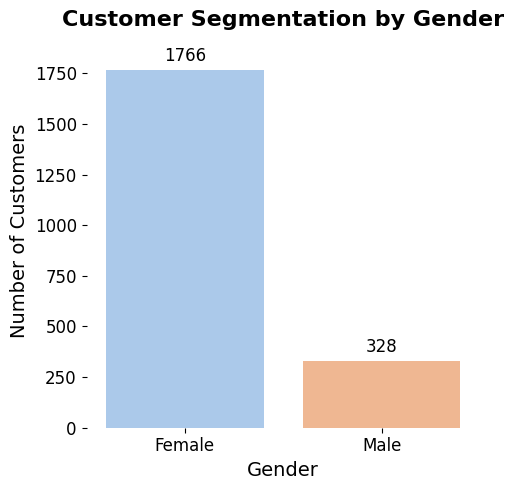

In [453]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Customer segmentation by gender
gender_segmentation = customerdata.groupby('Gender')['Name'].count()

# Plot a bar chart with enhanced formatting
plt.figure(figsize=(5, 5))
colors = sns.color_palette("pastel")
ax = sns.barplot(x=gender_segmentation.index, y=gender_segmentation.values, palette=colors)

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Adding titles and labels
plt.title("Customer Segmentation by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(gender_segmentation.values) * 1.1)  # Adjust ylim for better visualization

# Display the plot
plt.tight_layout()
plt.show()

•	What are the customers group that contribute the highest sales revenue? Identify the age group could be utilized to focus marketing activities

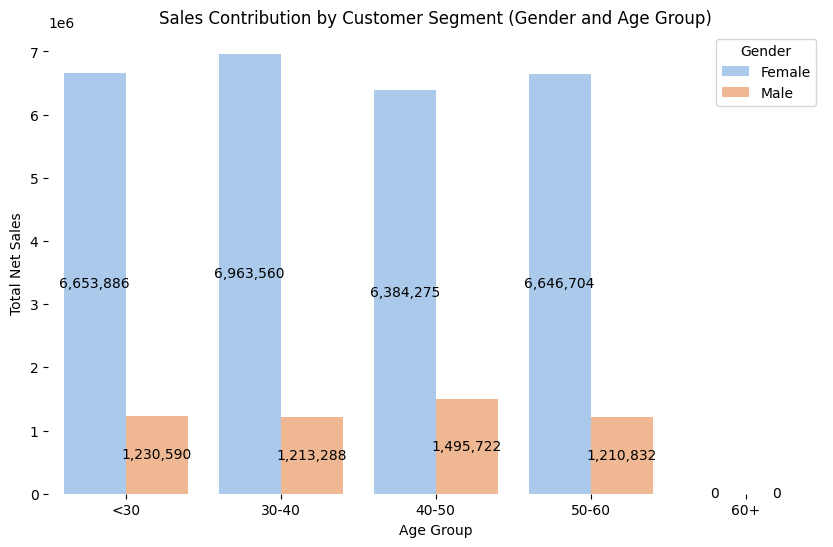

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Customer segmentation based on gender and age
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
customerdata['Age Group'] = pd.cut(customerdata['Age'], bins=age_bins, labels=age_labels)

# Segment customers by gender and age group
segmented_data = customerdata.groupby(['Gender', 'Age Group'])[['Net Sales', 'Gross Sales']].sum().reset_index()

# Plot a stacked bar chart to visualize sales contribution by segment
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")  # Set a pastel color palette
sns.barplot(data=segmented_data, x='Age Group', y='Net Sales', hue='Gender')
plt.title("Sales Contribution by Customer Segment (Gender and Age Group)")
plt.xlabel("Age Group")
plt.ylabel("Total Net Sales")
plt.legend(title="Gender")

# Add data labels to the bars
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    plt.text(p.get_x() + width / 2, p.get_y() + height / 2, f'{int(height):,}', ha='center', va='center')

plt.show()

 • What are the top-selling products by category and brand? 

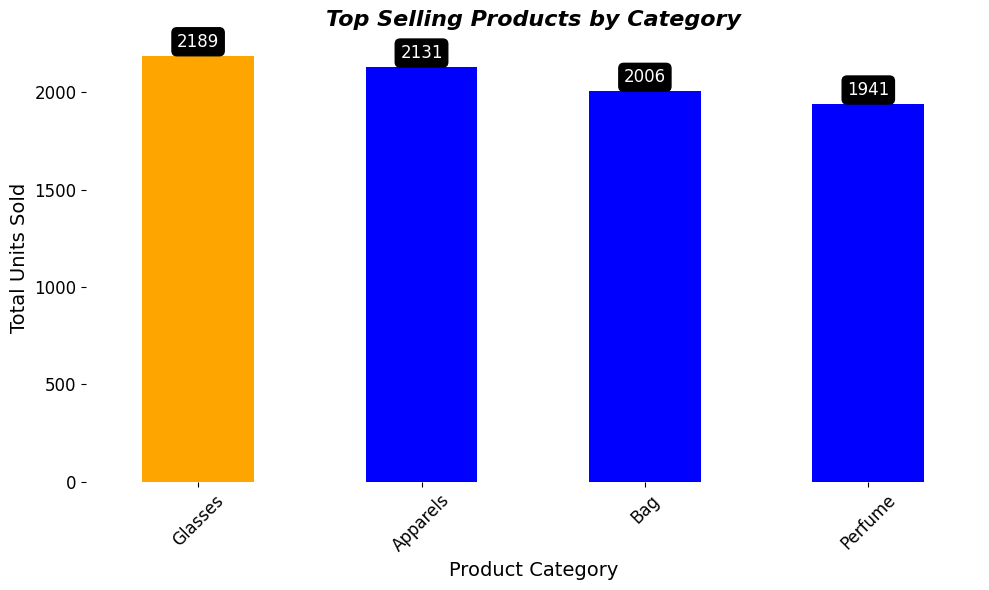

In [455]:
## What are the top-selling products by category and brand? 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Top selling products by category
top_products_by_category = productdata.groupby('Product_Category')['Unit_Sold'].sum()

# Plot a bar chart with enhanced formatting
plt.figure(figsize=(10, 6))

# Highlight color for the highest value
highlight_color = 'orange'

# Sort the data in descending order and plot the bar chart
sorted_data = top_products_by_category.sort_values(ascending=False)
bars = sorted_data.plot(kind='bar', color=[highlight_color if x == sorted_data.max() else 'blue' for x in sorted_data])

# Adding data labels on top of each bar with a box
for p in bars.patches:
    height = p.get_height()
    bars.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=12, color='white', xytext=(0, 10),
                  textcoords='offset points', bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))

# Adding titles and labels
plt.title("Top Selling Products by Category", fontsize=16, fontweight='bold', fontstyle = 'italic')
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Total Units Sold", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


•	Are there any seasonal trends or patterns in sales that can inform inventory management? Create a sales forecast for the next few months

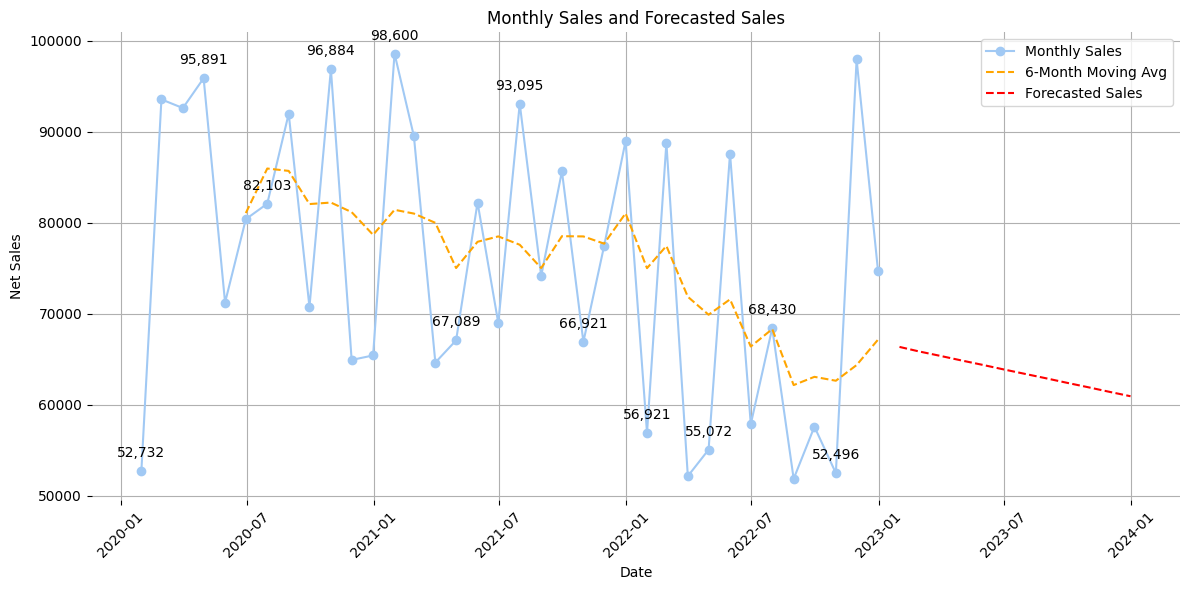

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate hypothetical sales data
np.random.seed(0)
date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales_data = pd.DataFrame({
    'Date': date_range,
    'Net Sales': np.random.randint(50000, 100000, size=len(date_range))
})

# Calculate the 6-month moving average for sales
sales_data['Moving Average'] = sales_data['Net Sales'].rolling(window=6).mean()

# Create a linear regression model for sales forecasting
X = np.arange(len(sales_data)).reshape(-1, 1)
y = sales_data['Net Sales'].values
model = LinearRegression()
model.fit(X, y)

# Generate future dates for forecasting
future_dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
future_X = np.arange(len(sales_data), len(sales_data) + len(future_dates)).reshape(-1, 1)

# Make sales forecasts using the linear regression model
forecasted_sales = model.predict(future_X)

# Create a dataframe for the forecasts
forecast_data = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Net Sales': forecasted_sales
})

# Combine original sales data with forecast data
combined_data = pd.concat([sales_data, forecast_data], ignore_index=True)

# Plot monthly sales and forecast
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['Net Sales'], label='Monthly Sales', marker='o')

# Add formatted data labels to selected monthly sales points
for idx, row in combined_data.iterrows():
    if idx % 3 == 0:  # Display every third label to reduce overlap
        plt.annotate('{:,.0f}'.format(row['Net Sales']), (row['Date'], row['Net Sales']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(combined_data['Date'], combined_data['Moving Average'], label='6-Month Moving Avg', linestyle='dashed', color='orange')
plt.plot(combined_data['Date'], combined_data['Forecasted Net Sales'], label='Forecasted Sales', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.title('Monthly Sales and Forecasted Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

How do sales vary across different regions or cities? Which country/ city generates highest sales?

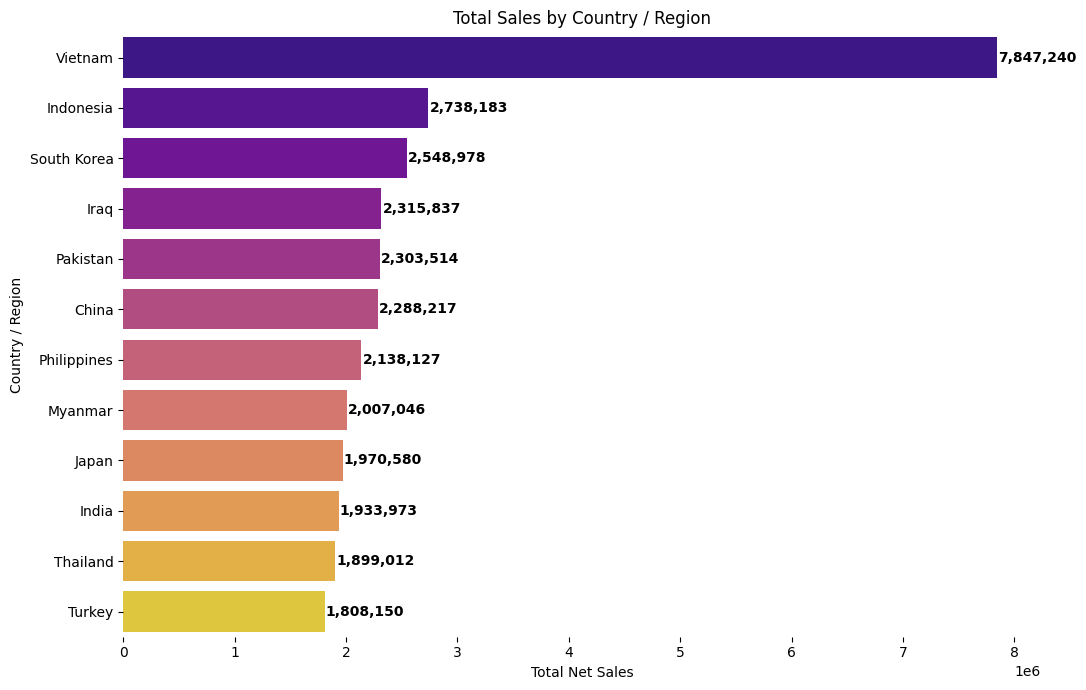

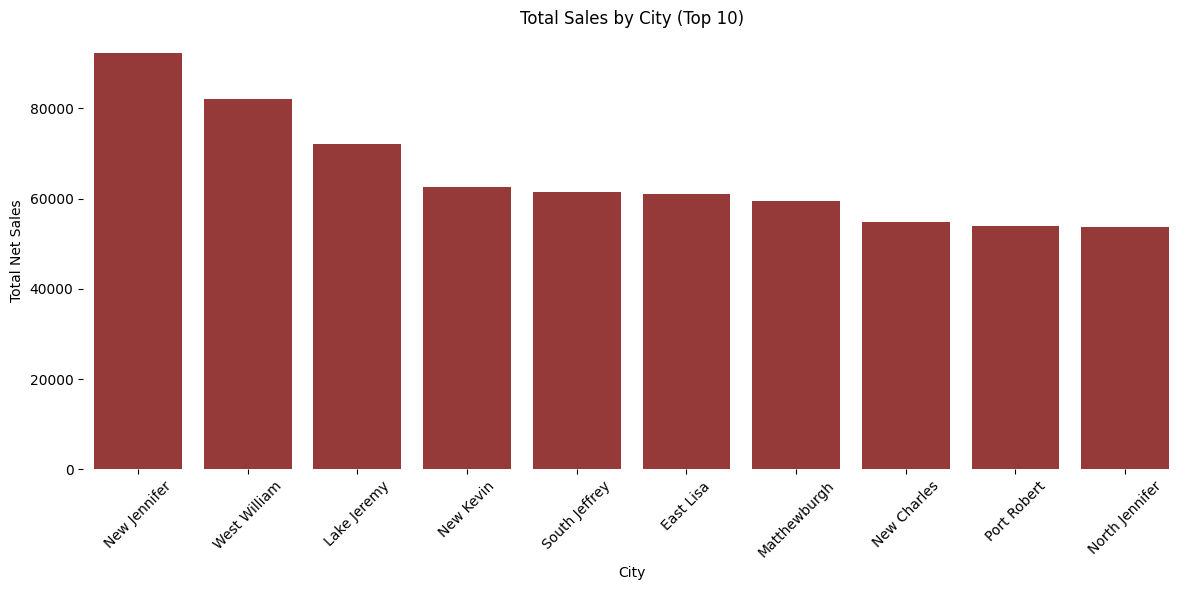

In [457]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Country / Region' and calculate total sales
sales_by_region = customerdata.groupby('Country / Region')['Net Sales'].sum().reset_index()

# Sort data in descending order of sales
sales_by_region = sales_by_region.sort_values('Net Sales', ascending=False)

# Plot sales by region (horizontal bar chart)
plt.figure(figsize=(11, 7))
sns.barplot(data=sales_by_region, x='Net Sales', y='Country / Region', palette='plasma')
plt.title("Total Sales by Country / Region")
plt.xlabel("Total Net Sales")
plt.ylabel("Country / Region")


# Add data labels to each bar
for i, v in enumerate(sales_by_region['Net Sales']):
    plt.text(v + 10000, i, f'{v:,}', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# Plot sales by city
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_city.head(10), x='City', y='Net Sales',  color = 'brown')
plt.title("Total Sales by City (Top 10)")
plt.xlabel("City")
plt.ylabel("Total Net Sales")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

•   ## Analyze Customer Retention and Loyalty
•	Which traffic sources generate the most sales and revenue? What is the customer retention rate over time, and how can it be improved?

Customer Retention Rate: 83.5%


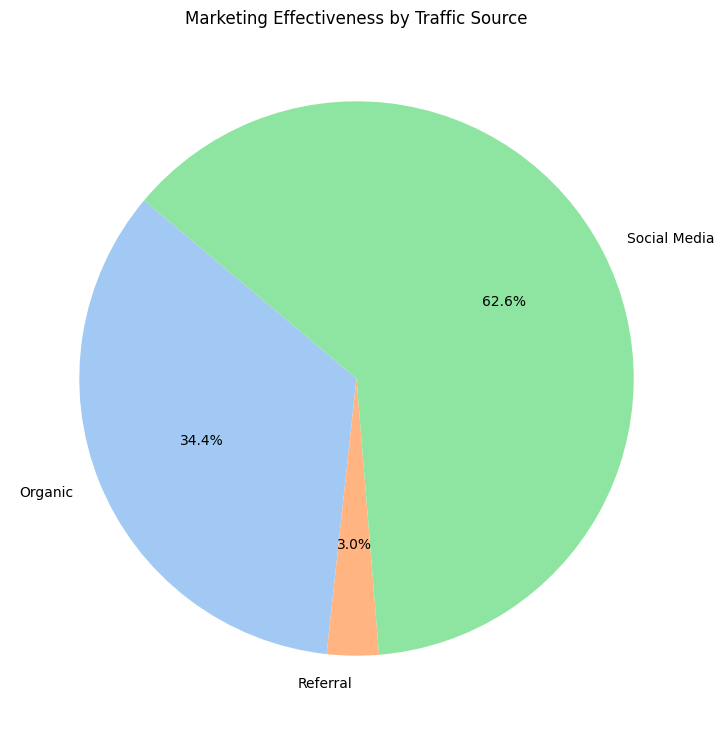

In [458]:
####	Customer Retention and Loyalty
# Calculate customer retention rate
total_customers = len(customerdata)
returning_customers = customerdata[customerdata['Customer type'] == 'Returning']
retention_rate = len(returning_customers) / total_customers * 100
# Print retention rate
print(f"Customer Retention Rate: {retention_rate:.1f}%")



# Traffic source analysis
traffic_source_analysis = customerdata.groupby('Traffic Source')['Net Sales'].sum()
highest_percentage_index = traffic_source_analysis.idxmax()
# Plot a pie chart
plt.figure(figsize=(9, 9))
plt.pie(
        traffic_source_analysis ,
        labels=traffic_source_analysis.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title("Marketing Effectiveness by Traffic Source")
plt.show()

•	Which products have the highest and lowest profit margins? From the result the company can know which brand to enhance its marketing activity to attract more customers

In [459]:
# Products with highest and lowest profit margins
productdata['Profit Margin'] = (productdata['Net_sales'] - productdata['Unit_Sold']) / productdata['Unit_Sold']

# Top and bottom products by profit margin
top_products_by_margin = productdata.nlargest(5, 'Profit Margin')
bottom_products_by_margin = productdata.nsmallest(5, 'Profit Margin')

#Format for easy reading - commas and decimal
pd.set_option('display.float_format', '{:,.0f}'.format)

# Print tables
print("Top Products by Profit Margin:")
print(top_products_by_margin)

print("\nBottom Products by Profit Margin:")
print(bottom_products_by_margin)

Top Products by Profit Margin:
    Product_Category   Brand  Unit_Sold  Net_sales  Profit Margin
10           Glasses  Hermes          7      77808         11,114
7            Glasses  Hermes          9      80564          8,951
30           Glasses   Prada         12      88000          7,332
31               Bag  Hermes          9      46000          5,110
139          Perfume     MCM          4      14000          3,499

Bottom Products by Profit Margin:
    Product_Category   Brand  Unit_Sold  Net_sales  Profit Margin
238         Apparels     MCM         19      38000          1,999
161         Apparels   Prada         28      56056          2,001
394          Glasses   Gucci         30      60120          2,003
69          Apparels     MCM         16      32096          2,005
413         Apparels  Hermes         24      48192          2,007


•	How is the number of units sold and net sales reflect for each brand ? Which category/ brand has the highest value? 

In [460]:
# Group data by brand and calculate total units sold and net sales
brand_analysis = productdata.groupby('Brand').agg({'Unit_Sold': 'sum','Net_sales': 'sum'}).sort_values(by='Net_sales', ascending=False)

# Find the brand with the highest net sales and units sold
highest_net_sales_brand = brand_analysis['Net_sales'].idxmax()
highest_units_sold_brand = brand_analysis['Unit_Sold'].idxmax()

# Find the product category with the highest net sales and units sold
category_highest_net_sales = productdata.groupby('Product_Category')['Net_sales'].sum().idxmax()
category_highest_units_sold = productdata.groupby('Product_Category')['Unit_Sold'].sum().idxmax()

# Print the analysis results
print("Brand Analysis as below")
print(brand_analysis)

print("\nBrand with Highest Net Sales:", highest_net_sales_brand)
print("Brand with Highest Units Sold:", highest_units_sold_brand)

print("\nProduct Category with Highest Net Sales:", category_highest_net_sales)
print("Product Category with Highest Units Sold:", category_highest_units_sold)

Brand Analysis as below
         Unit_Sold  Net_sales
Brand                        
Hermes        2712    7737244
MCM           2240    6263401
Prada         1420    3814763
Dior          1258    3507787
Gucci          383     999162
Channel        254     667200

Brand with Highest Net Sales: Hermes
Brand with Highest Units Sold: Hermes

Product Category with Highest Net Sales: Glasses
Product Category with Highest Units Sold: Glasses


• What is the total gross sales over the years from 2018-2023 ? Quick capture of overall sales with highlighted top timeline of sales

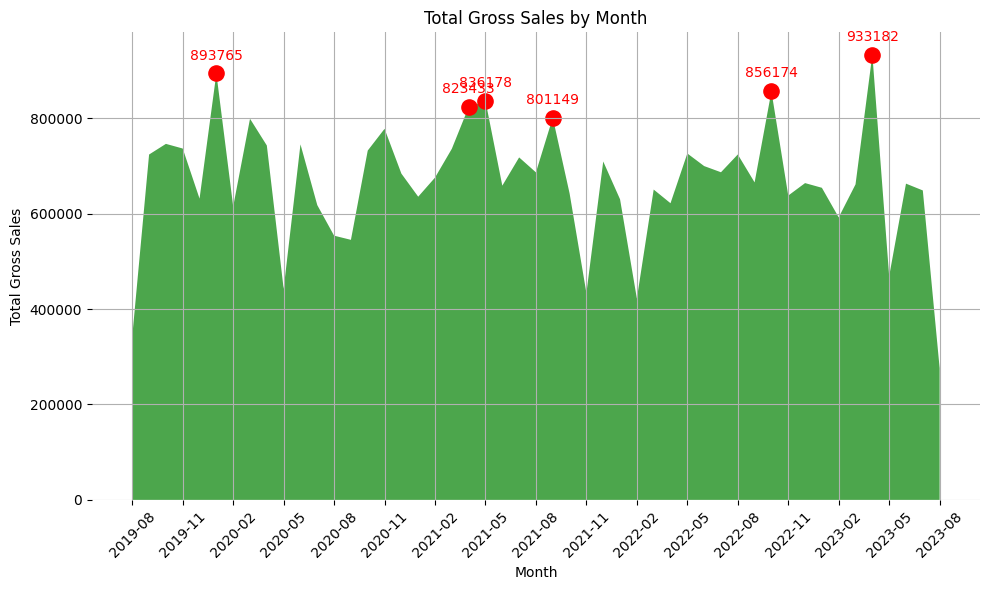

In [461]:

# Extract month and year from Purchase Date
customerdata['Purchase Date'] = pd.to_datetime(customerdata['Purchase Date'])  # Convert to datetime
customerdata['Month'] = customerdata['Purchase Date'].dt.strftime('%Y-%m')

# Group data by month and calculate total gross sales
total_gross_sales_by_month = customerdata.groupby('Month')['Gross Sales'].sum()

# Plot an area chart with markers and highlight points >= 800000
plt.figure(figsize=(10, 6))
plt.stackplot(total_gross_sales_by_month.index, total_gross_sales_by_month.values, labels=total_gross_sales_by_month.index, colors='green', alpha=0.7)

plt.title("Total Gross Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Gross Sales")
plt.grid(True)
plt.xticks(total_gross_sales_by_month.index[::3], rotation=45)  # Display every 3 months for better visibility

plt.tight_layout()

# Highlight points where gross sales >= 800000
highlighted_indices = total_gross_sales_by_month[total_gross_sales_by_month >= 800000].index
plt.scatter(highlighted_indices, total_gross_sales_by_month[highlighted_indices], color='red', marker='o', s=120, label='Gross Sales >= 800000')
for month in highlighted_indices:
    plt.annotate(str(total_gross_sales_by_month[month]), (month, total_gross_sales_by_month[month]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')


plt.show()

In [462]:
customerdata.head()

,Name,Order ID,Purchase Date,Gender,Fee,Status,Orders,Country / Region,City,Net Sales,Gross Sales,Traffic Source,Shipping Amount,Coupon Amount,Age,Customer type,Age Group,Month
0,Thomas Reed,9087,2022-03-24,Female,60,Delivered,5,Vietnam,Medinastad,7710,8202,Organic,123,219,39,Returning,30-40,2022-03
1,Paul Adams,3822,2021-04-18,Female,22,Delivered,2,Thailand,Michaelburgh,5135,5454,Social Media,27,110,51,Returning,50-60,2021-04
2,Stephanie Davis,3307,2020-11-27,Female,89,Delivered,3,Turkey,Port Nancy,16149,16623,Social Media,82,118,40,Returning,30-40,2020-11
3,Seth Moore,8329,2020-02-07,Female,47,Delivered,7,Thailand,Lauriemouth,9004,9128,Organic,116,205,44,Returning,40-50,2020-02
4,Alicia Lee,7788,2022-12-30,Female,80,Delivered,9,Pakistan,South Tonymouth,12749,12982,Organic,79,437,30,Returning,<30,2022-12


In [463]:
productdata.head()

,Product_Category,Brand,Unit_Sold,Net_sales,Profit Margin
0,Apparels,Hermes,18,40644,"2,257"
1,Apparels,Dior,14,36526,"2,608"
2,Glasses,MCM,5,15325,"3,064"
3,Perfume,Hermes,1,2677,"2,676"
4,Bag,Hermes,21,51744,"2,463"


•	Using the Pareto chart to show how are the brands contribute revenue? 
Reviewing the chart, we see that approx. 60% of sales revenue comes from "Hermes" and "MCM"; approx. 93% of total sales are generated through these 4 brands: Hermes, MCM, Prada and Dior

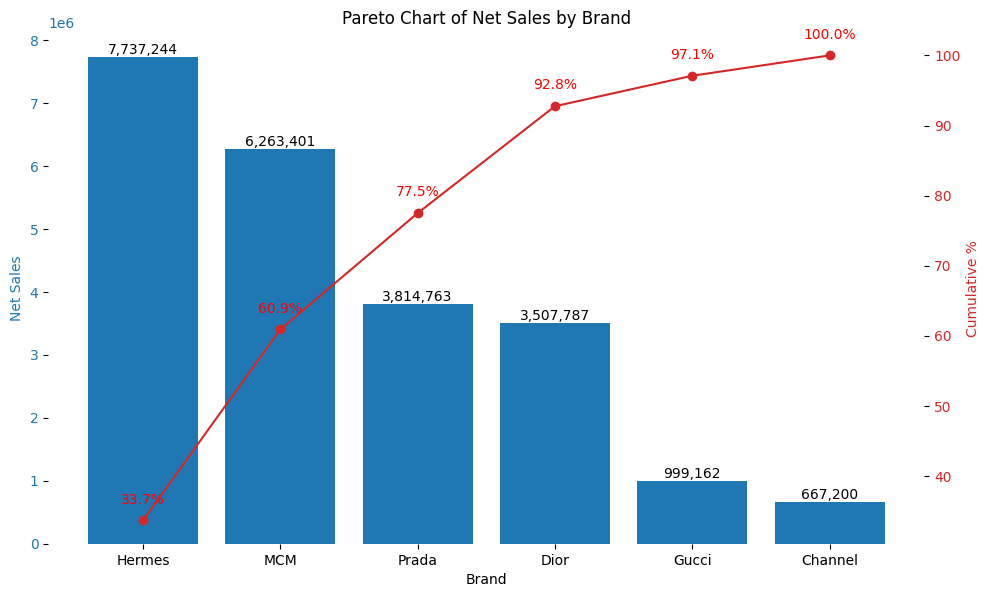

In [464]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Group data by Brand and calculate total Net Sales
net_sales_by_brand = productdata.groupby('Brand')['Net_sales'].sum()

# Sort the data from high to low
net_sales_by_brand = net_sales_by_brand.sort_values(ascending=False)

# Calculate cumulative percentage
total_sales = net_sales_by_brand.sum()
cumulative_percent = (net_sales_by_brand.cumsum() / total_sales) * 100

# Create a Pareto Chart
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
bars = ax1.bar(net_sales_by_brand.index, net_sales_by_brand.values, color=color)
ax1.set_xlabel("Brand")
ax1.set_ylabel("Net Sales", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.plot(net_sales_by_brand.index, cumulative_percent, color=color, marker='o')
ax2.set_ylabel("Cumulative %", color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add data labels to the cumulative percentage points
for x, y in zip(net_sales_by_brand.index, cumulative_percent):
    plt.text(x, y + 2, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, color='red')

# Add data labels on top of each bar with commas
def add_commas(x, pos):
    return f'{x:,.0f}'

formatter = FuncFormatter(add_commas)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(formatter))

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

plt.xticks(range(len(net_sales_by_brand)), net_sales_by_brand.index)
fig.tight_layout()
plt.title("Pareto Chart of Net Sales by Brand")


plt.show()

• Which are top 10 months with highest count of orders?

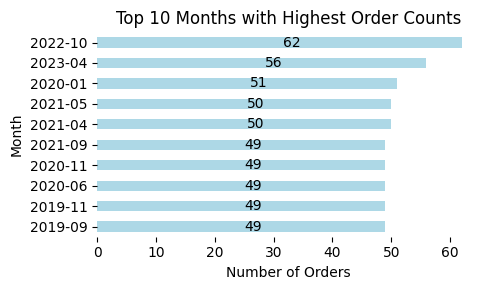

In [465]:
# Extract year and month from "Purchase Date" and create a new column
customerdata["Month"] = customerdata["Purchase Date"].dt.strftime('%Y-%m')

# Group by year-month and count the number of orders
monthly_order_counts = customerdata.groupby("Month")["Order ID"].count()

# Get the top 10 months with the highest order counts
top_months = monthly_order_counts.nlargest(10)

# Create a horizontal bar chart
plt.figure(figsize=(5, 3))
ax = top_months.sort_values().plot(kind='barh', color='lightblue', width=0.5)
plt.xlabel('Number of Orders')
plt.ylabel('Month')
plt.title('Top 10 Months with Highest Order Counts')

# Add data labels to the bars
for i, v in enumerate(top_months.sort_values()):
    ax.text(v * 0.51, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

DATA VISUALIZATION USING MATPLOTLIB & SEABORN   -------- SUMMARY PAGE FOR ALL THE VISUALS FOR REPORT PURPOSE

C:\Users\PPham\AppData\Local\Temp\ipykernel_12576\17297805.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ax4.get_xticklabels(), fontsize = 12)


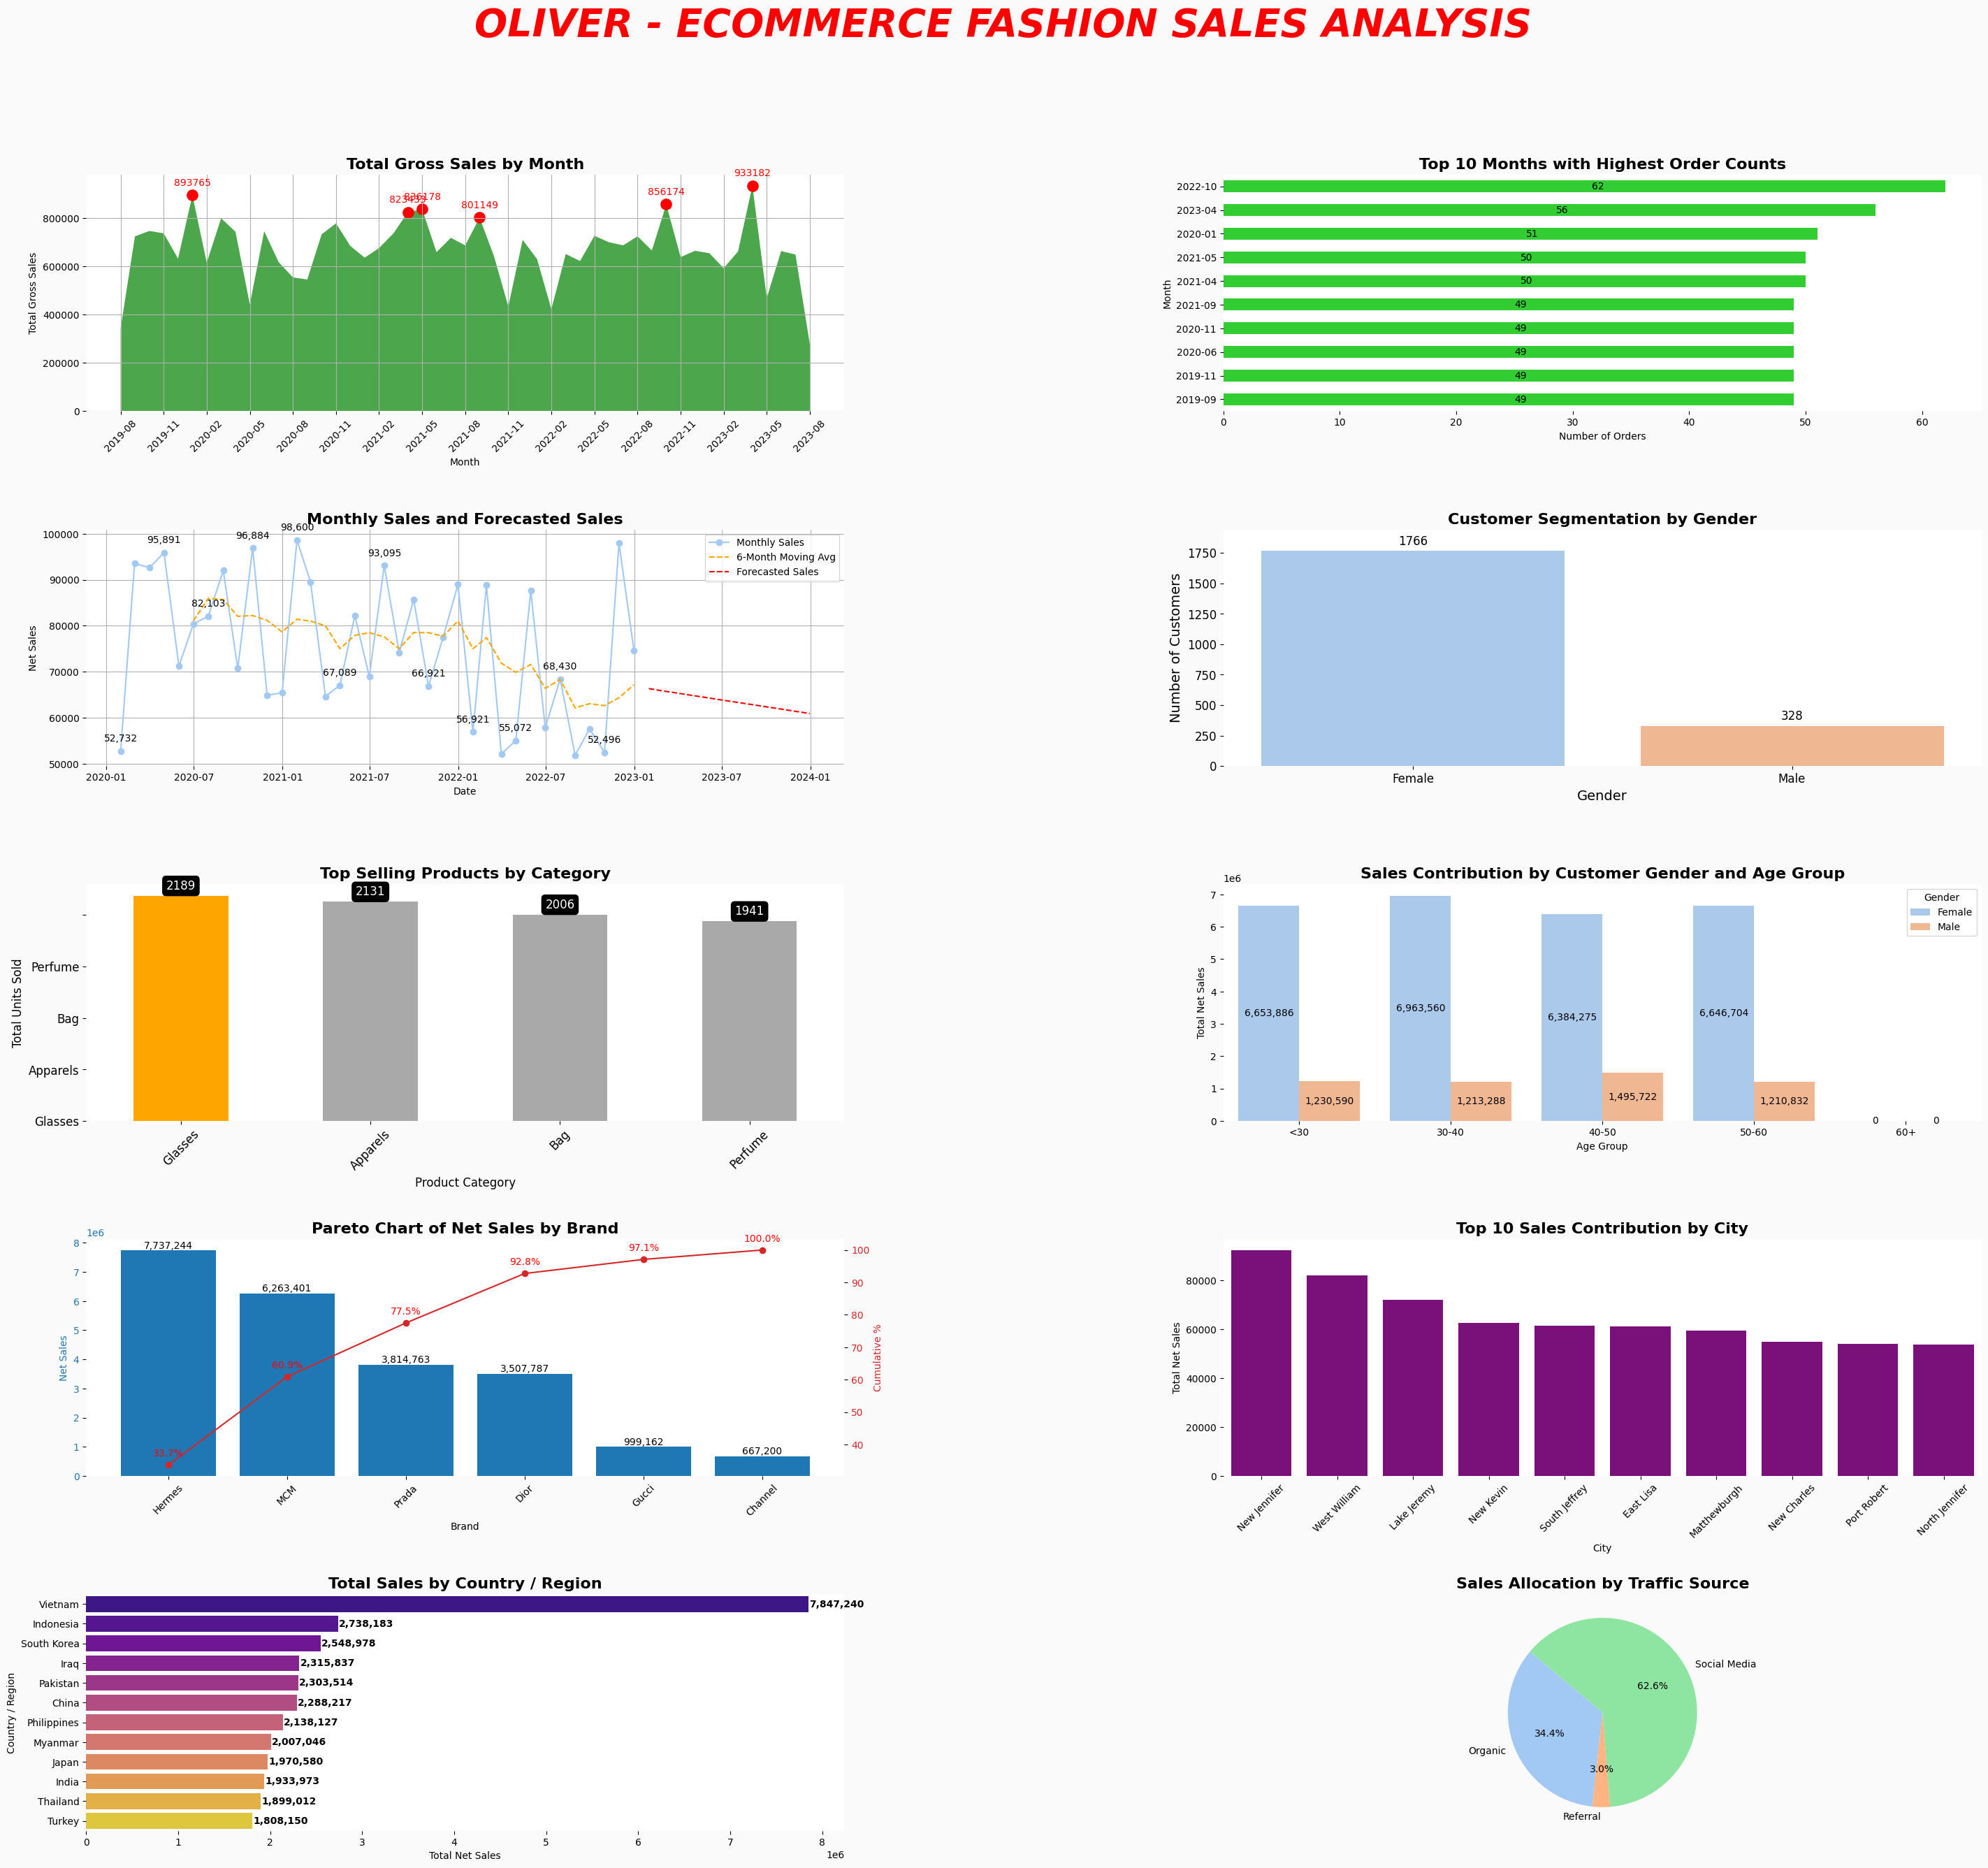

In [469]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FuncFormatter

# Create figure and subplots for the Dashboard
fig, axs = plt.subplots(5, 2, figsize=(35, 30), facecolor='#fafafa')

# set the dashboard default edge color 
plt.rcParams['axes.edgecolor'] = 'none'
# set the dashboard default color cycle 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#e8cccc'])

#### Assign each visualization to a subplot



# PLOT 1 - TOTAL CUSTOMERS BY GENDER

ax1 = axs[1, 1]  # Using the named subplot ax1
colors = sns.color_palette("pastel")
sns.barplot(x=gender_segmentation.index, y=gender_segmentation.values, palette=colors, ax=ax1)
# Adding data labels on top of each bar
for p in ax1.patches:  # Use ax1 here
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
ax1.set_title("Customer Segmentation by Gender", fontsize=16, fontweight='bold')
ax1.set_xlabel("Gender", fontsize=14)
ax1.set_ylabel("Number of Customers", fontsize=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_ylim(0, max(gender_segmentation.values) * 1.1)


# PLOT 2 - SALES REVENUE BY GENDER & AGE GROUP

ax2 = axs[2, 1]
sns.set_palette("pastel")  # Set a pastel color palette
sns.barplot(data= segmented_data, x='Age Group', y='Net Sales', hue='Gender', ax=ax2)
ax2.set_title("Sales Contribution by Customer Gender and Age Group",fontsize=16, fontweight='bold')
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Total Net Sales")
ax2.legend(title="Gender")
# Add data labels to the bars
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    ax2.text(p.get_x() + width / 2, p.get_y() + height / 2, f'{int(height):,}', ha='center', va='center')


# PLOT 3 - TOP 10 MONTHS - HIGHEST ORDER COUNTS

ax3 = axs[0,1]
# Get the top 10 months with the highest order counts
top_months = monthly_order_counts.nlargest(10)
# Create a horizontal bar chart
ax3 = top_months.sort_values().plot(kind='barh', color='limegreen', width=0.5, ax= ax3)
ax3.set_xlabel('Number of Orders')
ax3.set_ylabel('Month')
ax3.set_title('Top 10 Months with Highest Order Counts',fontsize=16, fontweight='bold')
# Add data labels to the bars
for i, v in enumerate(top_months.sort_values()):
    ax3.text(v * 0.51, i, str(v), color='black', va='center')


# PLOT 4 - TOP SELLING PRODUCTS BY CATEGORY

ax4 = axs[2,0]
# Sort the data in descending order and plot the bar chart
highlight_color = 'orange'
sorted_data = top_products_by_category.sort_values(ascending=False)
bars = sorted_data.plot(kind='bar', color=[highlight_color if x == sorted_data.max() else 'darkgrey' for x in sorted_data], ax= ax4)
# Adding data labels on top of each bar with a box
for p in bars.patches:
    height = p.get_height()
    bars.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=12, color='white', xytext=(0, 10),
                  textcoords='offset points', bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
# Adding titles and labels
ax4.set_title("Top Selling Products by Category", fontsize=16, fontweight='bold')
ax4.set_xlabel("Product Category", fontsize=12)
ax4.set_ylabel("Total Units Sold", fontsize=12)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, fontsize = 12)
ax4.set_yticklabels(ax4.get_xticklabels(), fontsize = 12)


# PLOT 5 - Sales Overview by month & Forecast revenue

ax5 = axs[1, 0]  # Using the named subplot ax5
# Generate hypothetical sales data
np.random.seed(0)
date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales_data = pd.DataFrame({
    'Date': date_range,
    'Net Sales': np.random.randint(50000, 100000, size=len(date_range))
})
# Calculate the 6-month moving average for sales
sales_data['Moving Average'] = sales_data['Net Sales'].rolling(window=6).mean()
# Create a linear regression model for sales forecasting
X = np.arange(len(sales_data)).reshape(-1, 1)
y = sales_data['Net Sales'].values
model = LinearRegression()
model.fit(X, y)
# Generate future dates for forecasting
future_dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
future_X = np.arange(len(sales_data), len(sales_data) + len(future_dates)).reshape(-1, 1)
# Make sales forecasts using the linear regression model
forecasted_sales = model.predict(future_X)
# Create a dataframe for the forecasts
forecast_data = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Net Sales': forecasted_sales
})
# Combine original sales data with forecast data
combined_data = pd.concat([sales_data, forecast_data], ignore_index=True)
# Plot monthly sales and forecast using ax5
ax5.plot(combined_data['Date'], combined_data['Net Sales'], label='Monthly Sales', marker='o')
for idx, row in combined_data.iterrows():
    if idx % 3 == 0:  # Display every third label to reduce overlap
        ax5.annotate('{:,.0f}'.format(row['Net Sales']), (row['Date'], row['Net Sales']), textcoords="offset points", xytext=(0, 10), ha='center')

ax5.plot(combined_data['Date'], combined_data['Moving Average'], label='6-Month Moving Avg', linestyle='dashed', color='orange')
ax5.plot(combined_data['Date'], combined_data['Forecasted Net Sales'], label='Forecasted Sales', linestyle='dashed', color='red')

ax5.set_xlabel('Date')
ax5.set_ylabel('Net Sales')
ax5.set_title('Monthly Sales and Forecasted Sales',fontsize=16, fontweight='bold')
ax5.legend()
ax5.grid(True)

# PLOT 6 - SALES BY COUNTRY/ REGION

ax6 = axs[4, 0]
# Group data by 'Country / Region' and calculate total sales
sales_by_region = customerdata.groupby('Country / Region')['Net Sales'].sum().reset_index()
# Sort data in descending order of sales
sales_by_region = sales_by_region.sort_values('Net Sales', ascending=False)
# Plot sales by region (horizontal bar chart)
sns.barplot(data=sales_by_region, x='Net Sales', y='Country / Region', palette='plasma',ax= ax6)
ax6.set_title("Total Sales by Country / Region",fontsize=16, fontweight='bold')
ax6.set_xlabel("Total Net Sales")
ax6.set_ylabel("Country / Region")
# Add data labels to each bar
for i, v in enumerate(sales_by_region['Net Sales']):
    ax6.text(v + 10000, i, f'{v:,}', va='center', color='black', fontweight='bold')


# PLOT 7 - SALES REVENUE BY CITIES

ax7 = axs[3, 1]
sns.barplot(data=sales_by_city.head(10), x='City', y='Net Sales',  color = 'darkmagenta',ax = ax7)
ax7.set_title("Top 10 Sales Contribution by City",fontsize=16, fontweight='bold')
ax7.set_xlabel("City")
ax7.set_ylabel("Total Net Sales")
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45)


# PLOT 8 - TRAFFIC SOURCE SALES ALLOCATION

ax8 = axs[4, 1]
# Traffic source analysis
traffic_source_analysis = customerdata.groupby('Traffic Source')['Net Sales'].sum()
highest_percentage_index = traffic_source_analysis.idxmax()
# Plot a pie chart
ax8.pie(
        traffic_source_analysis ,
        labels=traffic_source_analysis.index, 
        autopct='%1.1f%%', 
        startangle=140)
ax8.set_title("Sales Allocation by Traffic Source", fontsize=16, fontweight='bold')


# PLOT 9 - TOTAL GROSS SALES WITH HIGHLIGHTED TOP MONTHS

ax9 = axs[0, 0]
# Plot an area chart with markers and highlight points >= 800000
ax9.stackplot(total_gross_sales_by_month.index, total_gross_sales_by_month.values, labels=total_gross_sales_by_month.index, colors='green', alpha=0.7)
ax9.set_title("Total Gross Sales by Month",fontsize=16, fontweight='bold')
ax9.set_xlabel("Month")
ax9.set_ylabel("Total Gross Sales")
ax9.grid(True)
ax9.set_xticks(total_gross_sales_by_month.index[::3])  # Set x-axis tick positions
ax9.set_xticklabels(total_gross_sales_by_month.index[::3], rotation=45)  # Display every 3 months for better visibility
# Highlight points where gross sales >= 800000
highlighted_indices = total_gross_sales_by_month[total_gross_sales_by_month >= 800000].index
ax9.scatter(highlighted_indices, total_gross_sales_by_month[highlighted_indices], color='red', marker='o', s=120, label='Gross Sales >= 800000')
for month in highlighted_indices:
    ax9.annotate(str(total_gross_sales_by_month[month]), (month, total_gross_sales_by_month[month]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')


# PLOT 10 - NET SALES BY BRANDS

ax10 = axs[3, 0]
# Group data by Brand and calculate total Net Sales
net_sales_by_brand = productdata.groupby('Brand')['Net_sales'].sum()
# Sort the data from high to low
net_sales_by_brand = net_sales_by_brand.sort_values(ascending=False)
# Calculate cumulative percentage
total_sales = net_sales_by_brand.sum()
cumulative_percent = (net_sales_by_brand.cumsum() / total_sales) * 100
color21 = 'tab:blue'
bars = ax10.bar(net_sales_by_brand.index, net_sales_by_brand.values, color=color21)
ax10.set_xlabel("Brand")
ax10.set_ylabel("Net Sales", color=color21)
ax10.tick_params(axis='y', labelcolor=color21)
ax10_twin = ax10.twinx()  # instantiate a second axes that shares the same x-axis
color22 = 'tab:red'
ax10_twin.plot(net_sales_by_brand.index, cumulative_percent, color=color22, marker='o')
ax10_twin.set_ylabel("Cumulative %", color=color22)
ax10_twin.tick_params(axis='y', labelcolor=color22)
# Add data labels to the cumulative percentage points
for x, y in zip(net_sales_by_brand.index, cumulative_percent):
    ax10_twin.text(x, y + 2, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, color='red')
# Add data labels on top of each bar with commas
def add_commas(x, pos):
    return f'{x:,.0f}'

formatter = FuncFormatter(add_commas)
ax10.xaxis.set_major_formatter(plt.FuncFormatter(formatter))

for bar in bars:
    height = bar.get_height()
    ax10.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

ax10.set_xticks(range(len(net_sales_by_brand)))
ax10.set_xticklabels(net_sales_by_brand.index, rotation=45)
ax10.set_title("Pareto Chart of Net Sales by Brand",fontsize=16, fontweight='bold')


#Add overall title to the Dashboard
fig.subplots_adjust(wspace=0.5, hspace=0.5, top=0.9)
fig.suptitle('OLIVER - ECOMMERCE FASHION SALES ANALYSIS', fontsize = 40, fontweight='bold', fontstyle = 'italic', color = 'red')
#Display all the visuals & charts
plt.show()

In [467]:
### Copyright: Oliver Pham